   # ``Employee Turnover Analytics``

**Course end Project done by- Akash Chauhan**

## Problem Statement:
The HR Department at Portobello Tech aims to address the critical issue of employee turnover by leveraging an innovative app that analyzes various employee work-related factors. This app assesses key metrics such as project involvement, monthly working hours, tenure, recent promotions, and salary levels to predict potential turnover risks. By utilizing historical data on employee satisfaction and work patterns, the HR Department seeks to identify and understand trends that may influence employees' decisions to stay or leave the company. The objective is to proactively predict and mitigate employee turnover, ultimately enhancing workforce stability and organizational performance.

In [1]:
# Importing the necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('hr_comma_sep.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
#checking the null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
# To view some basic statistical details like mean, percentile, std
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### From the above table we can infer the following points:
* 1. Employees have a relatively short tenure with the firm (average of 3.5 years, max of 10 years)
* 2. Employees are generally more satisfied than not (0.61 average satisfaction level)
* 3. Employyes are generally above average performers (0.716 average rating in their last evaluation)
* 4. 14.46% (approximately 1 in 7) of the people have had work accidents.


In [7]:
# Describing the Categorical varibale
df.describe(include='O')

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
# Rename the columns
df = df.rename(columns={'average_montly_hours':'average_weekly_hours', 'sales':'department'})

In [10]:
# calculate the Avg. weekly hours.
df['average_weekly_hours'] = df['average_weekly_hours']*12/52

# check the changes
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,36.230769,3,0,1,0,sales,low
1,0.80,0.86,5,60.461538,6,0,1,0,sales,medium
2,0.11,0.88,7,62.769231,4,0,1,0,sales,medium


In [11]:
# 'Number of projects' and 'avg weekly hours' seems to be related, so we need to check whether these two are not highly correlated. 
# if yes, then we would remove the feature.

np.corrcoef(df['number_project'], df['average_weekly_hours'])

# Observation: 
    # Below result gives 0.417 as coefficient of correlation therefore the two features are not highly correlated
    # therefore no need to remove any of the two feature.
    

array([[1.        , 0.41721063],
       [0.41721063, 1.        ]])

In [12]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Performing EDA to check which factor contribute most to employee turnover.

In [13]:
df[['salary', 'left']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

#From the below result we can observe that 30% employees who left had low salary, 20% employees left had medium salary and 7% employees left had high salary.
#This signifies that most of the employees left had low salary. 
#Therefore 'salary' feature can be considered as an Important factor contributing to the employees turnover.

,salary,left
1,low,0.296884
2,medium,0.204313
0,high,0.066289


In [14]:
df[['Work_accident', 'left']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='left', ascending=False)

# From the below result we can see that only 7.8% of employees left who had work accident and 26.5% employees left who did not have any work accident.
# Means having an accident at work does not necessarily correlate strongly with leaving the firm.
# Therefore we should not consider the Work_accident feature in our model.

,Work_accident,left
0,0,0.265160
1,1,0.077916


In [15]:
df[['department', 'left']].groupby(['department'], as_index=False).mean().sort_values(by='left', ascending=False)

# From the below result we can observe that most of the employees who left were from 'hr' deptt and
# All the other deptt have almost same percentage of employees turnover except 'RandD' & 'management' deptt.
# Both 'RandD' & 'management' deptt have least percentage of employees turnover as compared to other deptt.

,department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444


In [16]:
df[['number_project', 'left']].groupby(['number_project'], as_index=False).mean().sort_values(by='left', ascending=False)

# From the below result we can observe that:
# 1. 100% of employees who had worked on 7 projects left the organisation.
# 2. 66% of employees who had worked on 2 projects left.
# 3. 56% of employees who had worked on 6 projects left.
# 4. 22% of employees who had worked on 5 projects left.
# 5. 9% of employees who had worked on 4 projects left.
# 6. 2% of employees who had worked on 3 projects left.

# This signifies that all the employees who had worked on 7 projects left.
# Employees tend to leave when they're on a few projects or many projects.
# Include the number of projects feature, but consider turning it into a binary variable:
# "Normal" (between 3 and 5 projects, since the mean number of projects is 3.8) versus not

,number_project,left
5,7,1.000000
0,2,0.656198
4,6,0.557922
3,5,0.221659
2,4,0.093700
1,3,0.017756


In [17]:
df[['time_spend_company', 'left']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='left', ascending=False)

# From the below result we cans see that:
# Employees who have spent 7 years or more in the company did not leave the company.
# Employees who have spent between 4-6 years in the company tends to leave the company.
# So we can conclude that workers are more likely to leave once they've spent a few years at the firm, but after 7 years everyone has stayed
# Therefore we can include the years at the firm feature, but band years 7 and onward.

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [18]:
df[['satisfaction_level', 'left']].groupby(['satisfaction_level'], as_index=False).mean().sort_values(by='left', ascending=False)

# From the below Result we can see that:
# Employee who have satisfaction level is less than 0.50 tends to leave the company.
# Employee who have satisfaction level is more than 0.50 tends have to stayed in the company

,satisfaction_level,left
0,0.09,1.000000
2,0.11,1.000000
1,0.10,1.000000
29,0.38,0.814815
31,0.40,0.808612
...,...,...
85,0.94,0.000000
84,0.93,0.000000
9,0.18,0.000000
43,0.52,0.000000


In [19]:
# Checking whether 'department' affects the 'avg weekly hours' feature of the employee which in result affects employee turnover.
df[['department','average_weekly_hours']].groupby(['department'], as_index=False).mean().sort_values(by='average_weekly_hours', ascending=False)

# From the below result we can see that there are very minimal differences in the weekly hours worked across departments.
# The department feature does not seem very useful therefore we will not include this in our model.

,department,average_weekly_hours
9,technical,46.730175
0,IT,46.665225
4,management,46.442125
2,accounting,46.422224
7,sales,46.364158
1,RandD,46.338579
8,support,46.328813
6,product_mng,46.145915
5,marketing,46.012103
3,hr,45.850317


In [20]:
# Checking how many employees got promoted in last 5 years.
df['promotion_last_5years'].value_counts()

# From the below result we can see that only 319 employees got promoted in the last 5 years.
# This percentage is too small for the feature to be a meaningful predictor.
# Therefore we won't be using 'promotion_last_5years' feature in our model.

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [21]:
# Correlation

corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_weekly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


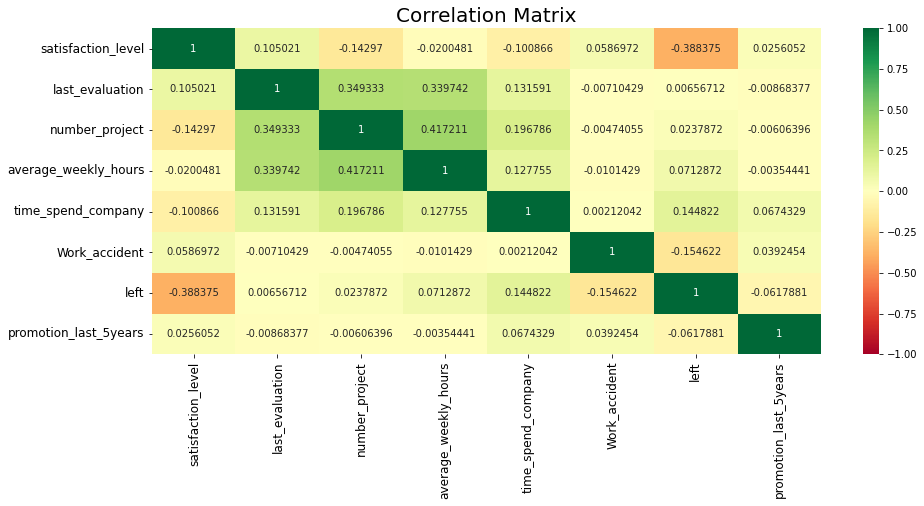

In [22]:
# Plotting the heatmap of correlation

plt.figure(figsize=(15,6))
sns.heatmap(corr, cmap='RdYlGn', fmt='g', annot= True, vmin=-1, vmax=1.0)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

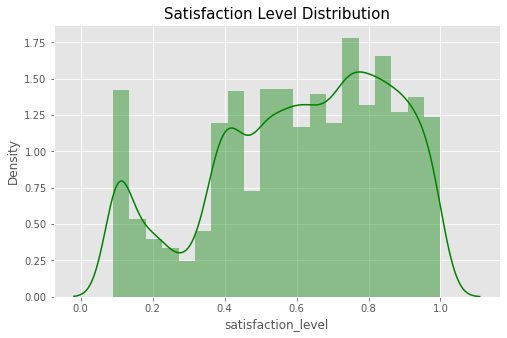

In [23]:
## Distribution Plot --> Employee Satisfaction
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.distplot(df['satisfaction_level'], bins=20, kde=True, hist=True, color='green')
plt.title('Satisfaction Level Distribution', fontsize=15)
plt.show()

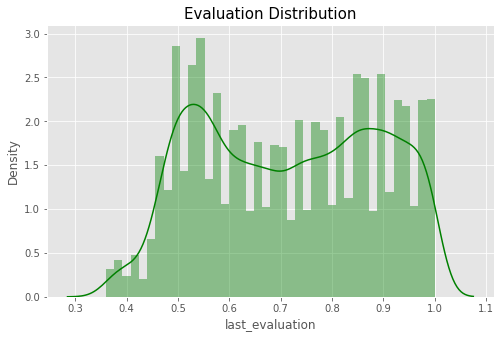

In [24]:
# Distribution Plot --> Employee Evaluation
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.distplot(df['last_evaluation'], bins=40, kde=True, hist=True, color='green')
plt.title('Evaluation Distribution', fontsize=15)
plt.show()

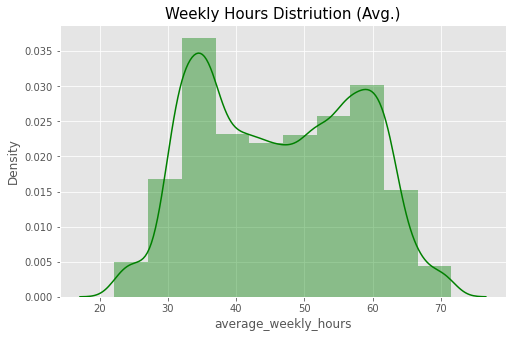

In [25]:
# Distribution Plot --> Employee Average Monthly Hours
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.distplot(df['average_weekly_hours'], bins=10, kde=True, hist=True, color='green')
plt.title('Weekly Hours Distriution (Avg.)', fontsize=15)
plt.show()

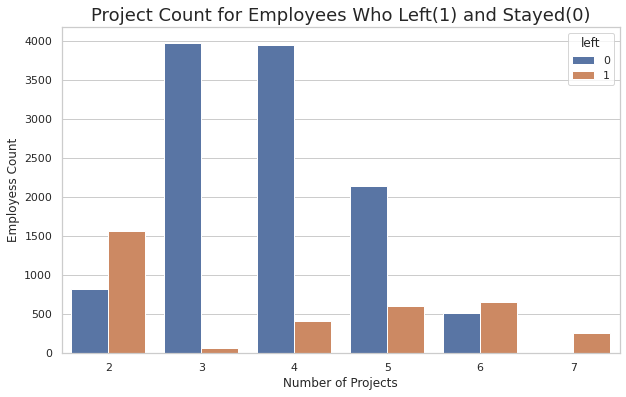

In [26]:
# Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization.

plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.countplot(x='number_project', data=df, hue='left')
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Employess Count', fontsize=12)
plt.title('Project Count for Employees Who Left(1) and Stayed(0)', fontsize=18)
plt.show()

#### Observations:
* Employees who have been involved in **3-5 projects** are **more likely to stay** in the company.
* Employees who have been involved in **fewer than 3 or more than 5 projects** are **more likely to leave** the company.

In [27]:
# dropping the columns which are not useful.

df = df.drop(['Work_accident', 'promotion_last_5years', 'average_weekly_hours', 'department'], axis=1)

### 3) Clustering of Employees who left based on their satisfaction and evaluation.

In [28]:
df_clust = df[['satisfaction_level', 'last_evaluation', 'left']]

In [29]:
# Calculation of z score.

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [30]:
# Preparing the data for Z score or Standard Scaler
df1 = df_clust.drop('left', axis=1)
df1.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [31]:
# Calculating Z Score:
z_score = ss.fit_transform(df1)
z_score

array([[-0.93649469, -1.08727529],
       [ 0.75281433,  0.84070693],
       [-2.02247906,  0.95755433],
       ...,
       [-0.97671633, -1.08727529],
       [-2.02247906,  1.42494396],
       [-0.97671633, -1.14569899]])

In [32]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)

In [33]:
kmeans_1 = k_means.fit(z_score)
kmeans_1

KMeans(n_clusters=3)

In [34]:
kmeans_1.labels_

array([1, 0, 2, ..., 1, 2, 1], dtype=int32)

In [35]:
df_clust['cluster 3'] = kmeans_1.labels_

In [36]:
df_clust.head()

,satisfaction_level,last_evaluation,left,cluster 3
0,0.38,0.53,1,1
1,0.80,0.86,1,0
2,0.11,0.88,1,2
3,0.72,0.87,1,0
4,0.37,0.52,1,1


In [37]:
df_clust['cluster 3'].value_counts()

1    6521
0    6476
2    2002
Name: cluster 3, dtype: int64

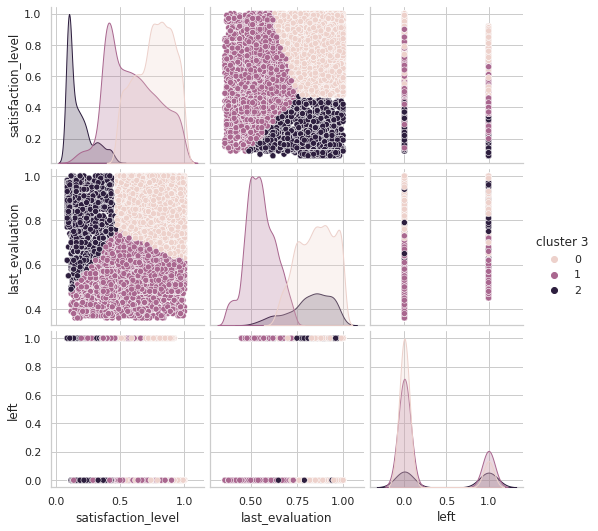

In [38]:
sns.pairplot(df_clust, hue='cluster 3')
plt.show()

### 4) Handling 'left' class Imblance using SMOTE Techinique.

In [39]:
# 4.1) Creating Dummies of Categorical variable

dummies= pd.get_dummies(df['salary'])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [40]:
# Concat dummies with original df.

data = pd.concat([df, dummies], axis=1)

In [41]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary,high,low,medium
0,0.38,0.53,2,3,1,low,0,1,0
1,0.80,0.86,5,6,1,medium,0,0,1
2,0.11,0.88,7,4,1,medium,0,0,1


In [42]:
# creating the features set.
X = data.drop(['left', 'salary'], axis=1)
y = data[['left']]

In [43]:
y.value_counts()

# as you can see target variable data are imbalance.
# we would handle this through SMOTE technique.

left
0       11428
1        3571
dtype: int64

In [44]:
# Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

In [45]:
X_train.shape , y_train.shape

((11999, 7), (11999, 1))

In [46]:
# using SMOTE Techinique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)

In [47]:
# Resample the training data using SMOTE
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

X_train_res.shape, y_train_res.shape

((18274, 7), (18274, 1))

In [48]:
len(y_train_res[y_train_res==0]), len(y_train_res[y_train_res==1])

(18274, 18274)

### 5) Perform K-fold cross-validation model training and evaluate performance.
   ##### We use different algorithm to train the model and its performance.
   * 1. Logistic Regression
   * 2. Random Forest Classifier
   * 3. Gradient Boosting Classifier
   * 4. Support Vector Machine
   * 5. Decision Tree Classifier

#### 1. **<u>Logistic Regression Algorithm:</u>**

In [49]:
# Using Logistic Regression Algorithm.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123)
model = lr.fit(X_train, y_train)
model

y_pred = model.predict(X_test)
y_pred

model.score(X_test, y_test)

0.764

In [50]:
# using Logistic Regression with K fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
lr_scores = cross_val_score(LogisticRegression(random_state=123), X_train, y_train, cv=5 )
print('\nScores', lr_scores)

lr_predict = cross_val_predict(LogisticRegression(random_state=123), X_test, y_test)
print('\nPredict',lr_predict)


Scores [0.77541667 0.75708333 0.76958333 0.77041667 0.77240517]

Predict [0 0 0 ... 0 0 0]


In [51]:
from sklearn.metrics import classification_report
# printing classification report:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2291
           1       0.45      0.20      0.28       709

    accuracy                           0.75      3000
   macro avg       0.62      0.56      0.57      3000
weighted avg       0.71      0.75      0.72      3000



#### 2. **<u>Random Forest Classifier Algorithm:</u>**

In [52]:
# Using Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#predict the rfc model
rfc_pred= rfc.predict(X_test)

#checking the accuracy
rfc.score(X_test, y_test)

0.9906666666666667

In [53]:
# using Randomforest with K fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
rfc_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5 )
print('\nScores', rfc_scores)

rfc_predict = cross_val_predict(RandomForestClassifier(), X_test, y_test)
print('\nPredict',rfc_predict)


Scores [0.98458333 0.98833333 0.98166667 0.98708333 0.98791163]

Predict [0 0 0 ... 1 0 0]


In [54]:
# printing classification report:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2291
           1       0.97      0.92      0.94       709

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



#### 3. **<u>Gradient Boosting Classifier Algorithm:</u>**

In [55]:
# Using Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# predict the model
gbc_pred = gbc.predict(X_test)

#checking accuracy
gbc.score(X_test, y_test)

0.9706666666666667

In [56]:
# using Gradient Boosting with K fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
gbc_scores = cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv=5 )
print('\nScores', gbc_scores)

gbc_predict = cross_val_predict(GradientBoostingClassifier(), X_test, y_test)
print('\nPredict',gbc_predict)


Scores [0.96666667 0.97875    0.97083333 0.975      0.9720717 ]

Predict [0 0 0 ... 1 0 0]


In [57]:
# printing classification report:
print(classification_report(y_test, gbc_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.94      0.92      0.93       709

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



#### 4. **<u>Support Vector Machine Algorithm:</u>**

In [58]:
# Using SVM with K fold cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
svm_scores = cross_val_score(SVC(), X_train, y_train, cv=5 )
print('\nScores', svm_scores)

svm_predict = cross_val_predict(SVC(), X_test, y_test)
print('\nPredict',svm_predict)


Scores [0.91958333 0.93333333 0.93208333 0.93125    0.93538975]

Predict [0 0 0 ... 0 0 0]


In [59]:
# printing classification report:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2291
           1       0.73      0.79      0.76       709

    accuracy                           0.88      3000
   macro avg       0.83      0.85      0.84      3000
weighted avg       0.89      0.88      0.88      3000



#### 5. **<u>Decision Tree Classifier Algorithm:</u>**

In [60]:
# Using Decision Tree Classifier with K fold cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
dtc_scores = cross_val_score(DecisionTreeClassifier(max_depth=10), X_train, y_train, cv=5 )
print('\nScores', dtc_scores)

dtc_predict = cross_val_predict(DecisionTreeClassifier(max_depth=10), X_test, y_test)
print('\nPredict',dtc_predict)


Scores [0.97041667 0.97875    0.97166667 0.97416667 0.97957482]

Predict [0 0 0 ... 1 0 0]


In [61]:
# printing classification report:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2291
           1       0.92      0.92      0.92       709

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



### 6) Model Evaluation

In [62]:
# Calcualting the Averages of all the model i.e. Logistic Regression, Random Forest, Gradient Boosting, SVM, Decision Tree.

lr_score_avg = np.mean(lr_scores)
rfc_score_avg = np.mean(rfc_scores)
gbc_score_avg = np.mean(gbc_scores)
svm_score_avg = np.mean(svm_scores)
dtc_score_avg = np.mean(dtc_scores)

print(lr_score_avg), print(rfc_score_avg), print(gbc_score_avg)
print(svm_score_avg), print(dtc_score_avg)


0.7689810337640683
0.985915659302487
0.972664339308045
0.9303279491454773
0.9749149645685702


(None, None)

                          Model     Score
1      Random Forest Classifier  0.985916
4                 Decision Tree  0.974915
2  Gradient Boosting Classifier  0.972664
3        Support Vector Machine  0.930328
0           Logistic Regression  0.768981


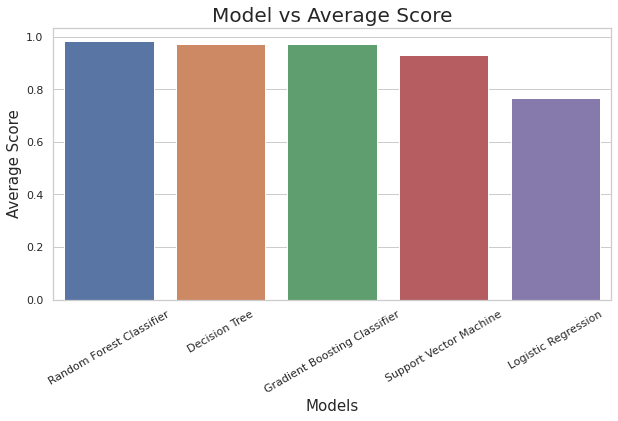

In [63]:
model = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine', 'Decision Tree'],
                     'Score':[lr_score_avg, rfc_score_avg, gbc_score_avg, svm_score_avg, dtc_score_avg]})

models = model.sort_values(by='Score', ascending=False)
print(models)

# visualizing the Model vs Score:
plt.figure(figsize=(10,5))
plt.title('Model vs Average Score', fontsize=20)
sns.barplot(x='Model', y='Score', data=models)    
plt.xticks(rotation=30)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Average Score', fontsize=15)
plt.show()

#### Observation:
* From the above result we can see that **Random Forest Classifier** scored the **highest predicting score i.e., 98.6%**

### 7) Retention Strategies:

#### After performing all the above analysis we can conclude the following retention strategies for our target employees:
* 1. Since majority percentage of employees turnover was from 'HR' deptt, therefore we need to bring in more employee friendly schemes particularly in HR deptt to reduce the employees turnover.
* 2. It was also observed that almost 30% of the total employees who left was because of the low salary, therefore we need to increase the salaries of the employees as per current industry standards and can also implement incentive and rewards scheme for the employees.
* 3. It was also observed in our analysis that employees who has worked on too many projects or too less projects tends to leave the company whereas employees who have worked on avg number of projects tends to stay, therefore we need to balance out the of project distribution among the employees, we need to check that some employees shouldn't get burdened with too many projects and also it should not be the case that some employees are having very less project and their time and skills are getting wasted.
* 4. It was also observed that senior employeees who have worked for more than 7 years in the company not to leave the company, whereas junior or mid level employees tends to leave the company, therefore we need to create policies and schemes (like for senior level employees) which makes junior and mid level employees of the company to remain stick to the company.
* 5. Also it was observed that those employees tends to leave who got either very low evaluation score or very high evaluation score from the company, we need to bring in more clarity and make evaluation measures more employee friendly so that employees don't consider the evaluation too seriously and always strive to emprove their scores.
* 6. I was also observed that employees leave when they are overworked or underworked, therefore we need to systematically plan and distribute the work among the employees to properly handle their work load management.
* 7. Also it was observed that out of total of '14999' employees, only '319' employees got promotion in the last 5 years, therefore we need to reward more employees more frequently in order to retain the target employees.

### Thank you!